## Importacion librerias

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import xgboost as xgb
plt.style.use('ggplot') 


## Importacion datasets

In [4]:
cards = pd.read_csv(r'cards_data.csv')
trans = pd.read_csv(r'transactions_data.csv')
users = pd.read_csv(r'users_data.csv')

#### Cards

In [5]:
cards.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [6]:
print(cards.dtypes)

id                        int64
client_id                 int64
card_brand               object
card_type                object
card_number               int64
expires                  object
cvv                       int64
has_chip                 object
num_cards_issued          int64
credit_limit             object
acct_open_date           object
year_pin_last_changed     int64
card_on_dark_web         object
dtype: object


#### Transactions

In [7]:
trans.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


In [8]:
print((trans.dtypes))

id                  int64
date               object
client_id           int64
card_id             int64
amount             object
use_chip           object
merchant_id         int64
merchant_city      object
merchant_state     object
zip               float64
mcc                 int64
errors             object
dtype: object


#### Users

In [9]:
users.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [10]:
print(users.dtypes)

id                     int64
current_age            int64
retirement_age         int64
birth_year             int64
birth_month            int64
gender                object
address               object
latitude             float64
longitude            float64
per_capita_income     object
yearly_income         object
total_debt            object
credit_score           int64
num_credit_cards       int64
dtype: object


### Resumen de datos

In [11]:
cards.describe()

,id,client_id,card_number,cvv,num_cards_issued,year_pin_last_changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,3072.500000,994.939636,4.820426e+15,506.220794,1.503091,2013.436707
std,1774.341709,578.614626,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,1536.250000,492.250000,4.486365e+15,257.000000,1.000000,2010.000000
50%,3072.500000,992.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,4608.750000,1495.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,6145.000000,1999.000000,6.997197e+15,999.000000,3.000000,2020.000000


In [12]:
trans.describe()

,id,client_id,card_id,merchant_id,zip,mcc
count,1.330592e+07,1.330592e+07,1.330592e+07,1.330592e+07,1.165321e+07,1.330592e+07
mean,1.558402e+07,1.026812e+03,3.475268e+03,4.772376e+04,5.132782e+04,5.565440e+03
std,4.704499e+06,5.816386e+02,1.674356e+03,2.581534e+04,2.940423e+04,8.757002e+02
min,7.475327e+06,0.000000e+00,0.000000e+00,1.000000e+00,1.001000e+03,1.711000e+03
25%,1.150604e+07,5.190000e+02,2.413000e+03,2.588700e+04,2.860200e+04,5.300000e+03
50%,1.557087e+07,1.070000e+03,3.584000e+03,4.592600e+04,4.767000e+04,5.499000e+03
75%,1.965361e+07,1.531000e+03,4.901000e+03,6.757000e+04,7.790100e+04,5.812000e+03
max,2.376187e+07,1.998000e+03,6.144000e+03,1.003420e+05,9.992800e+04,9.402000e+03


In [13]:
users.describe()

,id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.880000,-159.410000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837500,-97.395000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200000,-80.130000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200000,-68.670000,850.000000,9.000000


In [14]:
#leer archivos JSON
with open('mcc_codes.json', 'r') as file:
    codes = json.load(file)

with open('train_fraud_labels.json', 'r') as file:
    fraud = json.load(file)

In [15]:
# fraud_id = list(fraud['target'].keys())
# fraud_status = list(fraud['target'].values())

# fraud = pd.DataFrame({"id": fraud_id, 'Status': fraud_status})
# fraud.head()
# fraud['id'] = pd.to_numeric(fraud['id'])

In [16]:
code = list(codes.keys())
name = list(codes.values())

mcc = pd.DataFrame({'mcc': code, 'name': name})
mcc.head()

,mcc,name
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees


In [17]:
mcc['mcc'] = pd.to_numeric(mcc['mcc'])

### Unir df's

In [18]:
# renombrar variables

users.rename(columns={'id': 'client_id'}, inplace=True)

cards.rename(columns={'id': 'card_id'}, inplace=True)

trans.rename(columns={'id': 'transactions_id'}, inplace=True)

In [19]:
# unir trans con mcc
trans_1 = pd.merge(trans, mcc, on = 'mcc', how = 'inner')

# unir trans con cards and y users.

df_merged = trans_1.merge(cards, on='card_id', how='inner')

# eliminar columnas innecesarias

df_merged.drop(columns=['client_id_y'], inplace=True)

df_merged.rename(columns={'client_id_x': 'client_id'}, inplace=True)

# unir transactions_df con users.

df_merged = df_merged.merge(users, on='client_id', how='inner')

In [20]:
df_merged

,transactions_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,7,Female,594 Mountain View Street,46.80,-100.76,$23679,$48277,$110153,740,4
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,6,Male,604 Pine Street,40.80,-91.12,$18076,$36853,$112139,834,5
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,4,Male,2379 Forest Lane,33.18,-117.29,$16894,$34449,$36540,686,3
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,...,5,Female,903 Hill Boulevard,41.42,-87.35,$26168,$53350,$128676,685,5
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,5,Male,166 River Drive,38.86,-76.60,$33529,$68362,$96182,711,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,...,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,...,9,Male,6076 Bayview Boulevard,43.06,-87.96,$9995,$20377,$12092,789,4
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,...,4,Female,7927 Plum Lane,33.10,-96.66,$32580,$78329,$40161,720,3
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,...,12,Female,5887 Seventh Lane,37.68,-122.43,$23752,$48430,$62384,716,2


### Limpiando formato de los datos del df final

In [21]:
df_merged['amount'] = df_merged['amount'].str.replace('$', '').astype(float)

df_merged['credit_limit'] = df_merged['credit_limit'].str.replace('$', '').astype(float)

df_merged['per_capita_income'] = df_merged['per_capita_income'].str.replace('$', '').astype(float)

df_merged['yearly_income'] = df_merged['yearly_income'].str.replace('$', '').astype(float)

df_merged['total_debt'] = df_merged['total_debt'].str.replace('$', '').astype(float)

# variables de fecha en año

df_merged['expires'] = pd.to_datetime(df_merged['expires'], format='%m/%Y')

df_merged['acct_open_date'] = pd.to_datetime(df_merged['acct_open_date'], format='%m/%Y')

In [22]:
df_merged

,transactions_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,7,Female,594 Mountain View Street,46.80,-100.76,23679.0,48277.0,110153.0,740,4
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,6,Male,604 Pine Street,40.80,-91.12,18076.0,36853.0,112139.0,834,5
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,4,Male,2379 Forest Lane,33.18,-117.29,16894.0,34449.0,36540.0,686,3
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,...,5,Female,903 Hill Boulevard,41.42,-87.35,26168.0,53350.0,128676.0,685,5
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,5,Male,166 River Drive,38.86,-76.60,33529.0,68362.0,96182.0,711,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,...,11,Female,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,NaN,NaN,...,9,Male,6076 Bayview Boulevard,43.06,-87.96,9995.0,20377.0,12092.0,789,4
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.0,...,4,Female,7927 Plum Lane,33.10,-96.66,32580.0,78329.0,40161.0,720,3
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.0,...,12,Female,5887 Seventh Lane,37.68,-122.43,23752.0,48430.0,62384.0,716,2


In [23]:
# chequeando el formato de las columnas

nuuniq = []
dtyp = []
uuniq = []

for col in df_merged.columns:
    nuuniq.append(df_merged[col].nunique())
    dtyp.append(df_merged[col].dtype)
    uuniq.append(df_merged[col].unique()[0])

result = pd.DataFrame({"nombre_columna": df_merged.columns, 'conteo_valores_unicos': nuuniq, 'tipo_dato': dtyp, 'valor': uuniq})
result

,nombre_columna,conteo_valores_unicos,tipo_dato,valor
0,transactions_id,13305915,int64,7475327
1,date,4136496,object,2010-01-01 00:01:00
2,client_id,1219,int64,1556
3,card_id,4071,int64,2972
4,amount,81160,float64,-77.0
5,use_chip,3,object,Swipe Transaction
6,merchant_id,74831,int64,59935
7,merchant_city,12492,object,Beulah
8,merchant_state,199,object,ND
9,zip,25256,float64,58523.0


- se evidencian valores negativos en el gasto

- se evidencian valores NA en la columna 

Se procede a revisar porcentajes de valores faltantes en las columnas:

In [24]:
miss = []
rows = df_merged.shape[0]
per = []

for col in df_merged.columns:
    missing = df_merged[col].isnull().sum()
    miss.append(missing)
    percent = ( missing / rows)*100
    per.append(percent)

res = pd.DataFrame({'Nombre_columna': df_merged.columns, 'valores_nulos': miss, 'porcentaje_valores_nulos': per})
res

,Nombre_columna,valores_nulos,porcentaje_valores_nulos
0,transactions_id,0,0.000000
1,date,0,0.000000
2,client_id,0,0.000000
3,card_id,0,0.000000
4,amount,0,0.000000
5,use_chip,0,0.000000
6,merchant_id,0,0.000000
7,merchant_city,0,0.000000
8,merchant_state,1563700,11.751916
9,zip,1652706,12.420837


Lidiando con los valores faltantes de la columna errors:

In [25]:
df_merged['errors'].unique()

array([nan, 'Technical Glitch', 'Bad Expiration', 'Bad Card Number',
       'Insufficient Balance', 'Bad PIN', 'Bad CVV', 'Bad Zipcode',
       'Insufficient Balance,Technical Glitch',
       'Bad PIN,Insufficient Balance', 'Bad PIN,Technical Glitch',
       'Bad Expiration,Technical Glitch',
       'Bad Card Number,Bad Expiration',
       'Bad Card Number,Insufficient Balance',
       'Bad Expiration,Insufficient Balance', 'Bad Card Number,Bad CVV',
       'Bad CVV,Technical Glitch', 'Bad Expiration,Bad CVV',
       'Bad CVV,Insufficient Balance', 'Bad Card Number,Technical Glitch',
       'Bad Zipcode,Insufficient Balance',
       'Bad Card Number,Bad Expiration,Insufficient Balance',
       'Bad Zipcode,Technical Glitch'], dtype=object)

se observa que son pocos los errores de transaccion lo que es normal al uso de tarjetas de credito y debito por eso se proceda a imputar los valores NA´S con el valor de sin errores: Errorless

In [26]:
df_merged['errors'].fillna('Errorless', inplace = True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27932\305331244.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['errors'].fillna('Errorless', inplace = True)


Completar los valores faltantes en la columna merchant_state con la moda garantiza la consistencia al usar el valor más común,

In [27]:
df_merged['merchant_state'].fillna(df_merged['merchant_state'].mode()[0], inplace = True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_27932\214917048.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['merchant_state'].fillna(df_merged['merchant_state'].mode()[0], inplace = True)


box plot de la columna "zip" para identificar la técnica de imputación adecuada.

la media parece una buena imputacion debido a que el diagrama representa una distribucion normal, aunque para estar mas seguros de estos se deberia recurrir a una prueba estadistica adecuada para esto

In [28]:
df_merged.isnull().sum()

transactions_id                0
date                           0
client_id                      0
card_id                        0
amount                         0
use_chip                       0
merchant_id                    0
merchant_city                  0
merchant_state                 0
zip                      1652706
mcc                            0
errors                         0
name                           0
card_brand                     0
card_type                      0
card_number                    0
expires                        0
cvv                            0
has_chip                       0
num_cards_issued               0
credit_limit                   0
acct_open_date                 0
year_pin_last_changed          0
card_on_dark_web               0
current_age                    0
retirement_age                 0
birth_year                     0
birth_month                    0
gender                         0
address                        0
latitude  

In [29]:
df_merged

,transactions_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,...,7,Female,594 Mountain View Street,46.80,-100.76,23679.0,48277.0,110153.0,740,4
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,...,6,Male,604 Pine Street,40.80,-91.12,18076.0,36853.0,112139.0,834,5
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,...,4,Male,2379 Forest Lane,33.18,-117.29,16894.0,34449.0,36540.0,686,3
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,...,5,Female,903 Hill Boulevard,41.42,-87.35,26168.0,53350.0,128676.0,685,5
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,...,5,Male,166 River Drive,38.86,-76.60,33529.0,68362.0,96182.0,711,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,...,11,Female,766 Third Drive,34.02,-117.89,22681.0,33483.0,196.0,698,5
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,CA,NaN,...,9,Male,6076 Bayview Boulevard,43.06,-87.96,9995.0,20377.0,12092.0,789,4
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.0,...,4,Female,7927 Plum Lane,33.10,-96.66,32580.0,78329.0,40161.0,720,3
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.0,...,12,Female,5887 Seventh Lane,37.68,-122.43,23752.0,48430.0,62384.0,716,2


In [30]:
df_merged.columns

Index(['transactions_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'name', 'card_brand', 'card_type', 'card_number', 'expires',
       'cvv', 'has_chip', 'num_cards_issued', 'credit_limit', 'acct_open_date',
       'year_pin_last_changed', 'card_on_dark_web', 'current_age',
       'retirement_age', 'birth_year', 'birth_month', 'gender', 'address',
       'latitude', 'longitude', 'per_capita_income', 'yearly_income',
       'total_debt', 'credit_score', 'num_credit_cards'],
      dtype='object')

In [31]:
# 1. SELECCIÓN DE VARIABLES RELEVANTES
variables_modelo = [
    'client_id', 'amount', 'name', 'card_brand', 'card_type', 'merchant_state',
    'gender', 'current_age','per_capita_income', 'yearly_income', 'total_debt',
    'credit_score', 'num_credit_cards', 'num_cards_issued',
    'retirement_age', 'latitude', 'longitude',
    'acct_open_date',
]

df_model = df_merged[variables_modelo].copy()
df_model

,client_id,amount,name,card_brand,card_type,merchant_state,gender,current_age,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,num_cards_issued,retirement_age,latitude,longitude,acct_open_date
0,1556,-77.00,Miscellaneous Food Stores,Mastercard,Debit (Prepaid),ND,Female,30,23679.0,48277.0,110153.0,740,4,2,67,46.80,-100.76,2008-05-01
1,561,14.57,Department Stores,Mastercard,Credit,IA,Male,48,18076.0,36853.0,112139.0,834,5,1,67,40.80,-91.12,2005-09-01
2,1129,80.00,Money Transfer,Mastercard,Debit,CA,Male,49,16894.0,34449.0,36540.0,686,3,1,65,33.18,-117.29,2006-01-01
3,430,200.00,Money Transfer,Mastercard,Debit,IN,Female,52,26168.0,53350.0,128676.0,685,5,2,67,41.42,-87.35,2004-05-01
4,848,46.41,Drinking Places (Alcoholic Beverages),Visa,Debit,MD,Male,51,33529.0,68362.0,96182.0,711,2,1,69,38.86,-76.60,2009-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,1718,1.11,Miscellaneous Food Stores,Mastercard,Debit,CA,Female,81,22681.0,33483.0,196.0,698,5,1,67,34.02,-117.89,2019-03-01
13305911,1766,12.80,"Digital Goods - Media, Books, Apps",Mastercard,Debit,CA,Male,62,9995.0,20377.0,12092.0,789,4,1,66,43.06,-87.96,2004-03-01
13305912,199,40.44,"Utilities - Electric, Gas, Water, Sanitary",Mastercard,Debit,TX,Female,67,32580.0,78329.0,40161.0,720,3,1,67,33.10,-96.66,2004-02-01
13305913,1986,4.00,"Grocery Stores, Supermarkets",Visa,Debit,CA,Female,44,23752.0,48430.0,62384.0,716,2,2,69,37.68,-122.43,2005-11-01


- análisis descriptivo de los datos EDA

In [32]:
# 4. Estadísticas para variables categóricas (columnas tipo objeto)
cat_cols = df_model.select_dtypes(include=['object']).columns
print("\nConteo de valores únicos en variables categóricas:")
for col in cat_cols:
    print(f"\nColumna: {col}")
    print(df_model[col].value_counts(dropna=False).head(10))  # Top 10 valores




Conteo de valores únicos en variables categóricas:

Columna: name
name
Grocery Stores, Supermarkets     1592584
Miscellaneous Food Stores        1460875
Service Stations                 1424711
Eating Places and Restaurants     999738
Drug Stores and Pharmacies        772913
Tolls and Bridge Fees             674135
Wholesale Clubs                   601942
Money Transfer                    589140
Taxicabs and Limousines           500662
Fast Food Restaurants             499659
Name: count, dtype: int64

Columna: card_brand
card_brand
Mastercard    7157399
Visa          4957563
Amex           854490
Discover       336463
Name: count, dtype: int64

Columna: card_type
card_type
Debit              8280996
Credit             4109189
Debit (Prepaid)     915730
Name: count, dtype: int64

Columna: merchant_state
merchant_state
CA    2990787
TX    1010207
NY     857510
FL     701623
OH     484122
IL     467931
NC     429427
PA     417766
MI     397970
GA     368206
Name: count, dtype: int64

Co

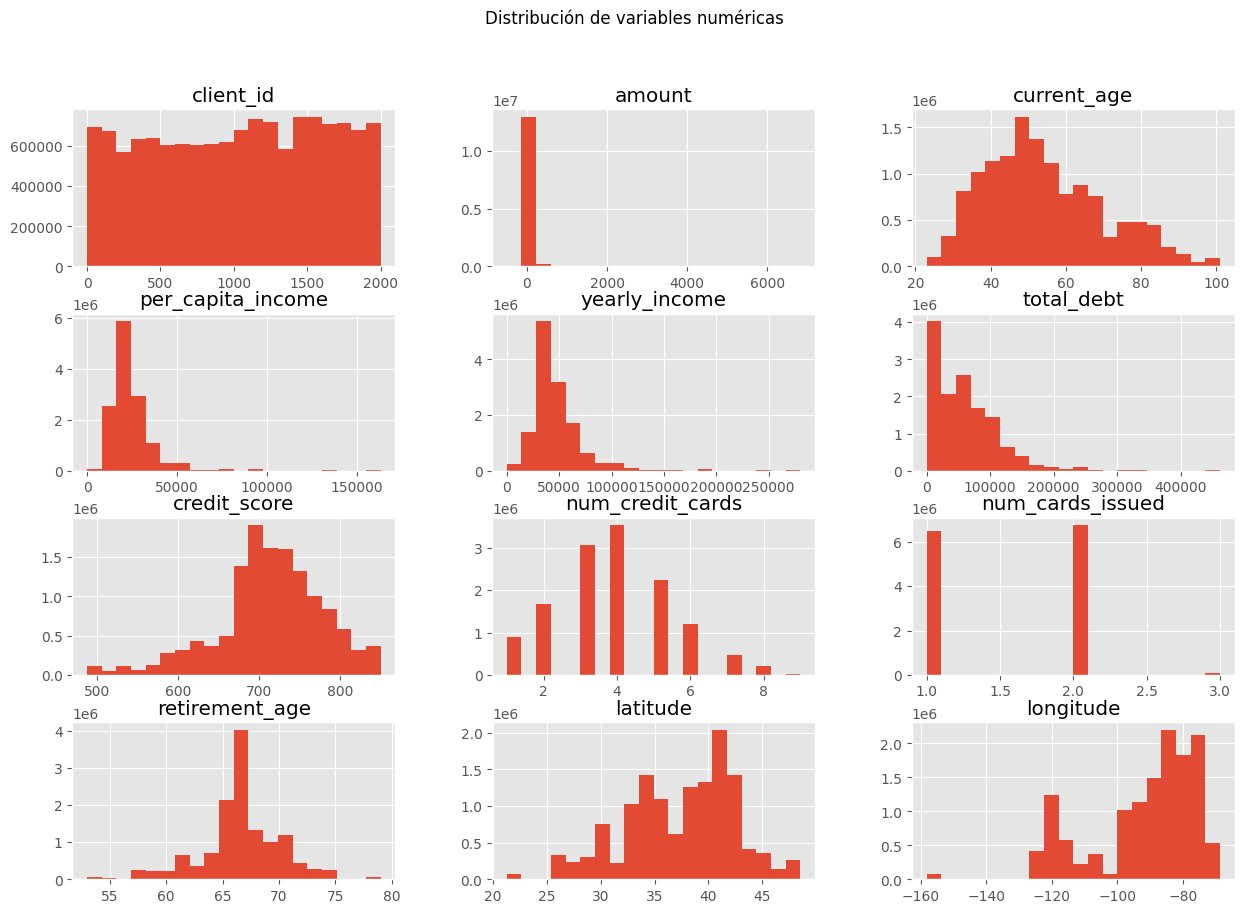

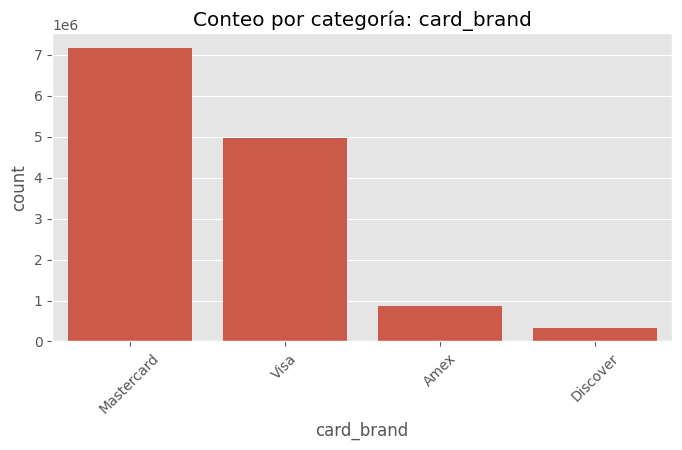

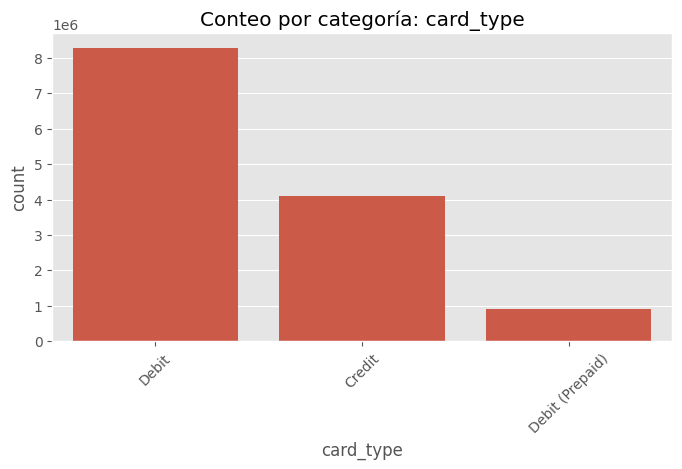

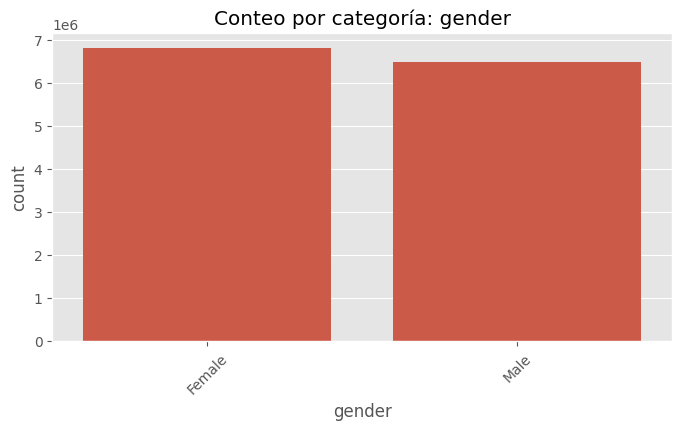

In [33]:
# 5. Visualizaciones básicas

# Histograma para variables numéricas
num_cols = df_model.select_dtypes(include=['number']).columns
df_model[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribución de variables numéricas')
plt.show()

# Barras para variables categóricas (las que tienen menos de 20 categorías)
for col in cat_cols:
    if df_model[col].nunique() < 20:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df_model, x=col, order=df_model[col].value_counts().index)
        plt.title(f'Conteo por categoría: {col}')
        plt.xticks(rotation=45)
        plt.show()



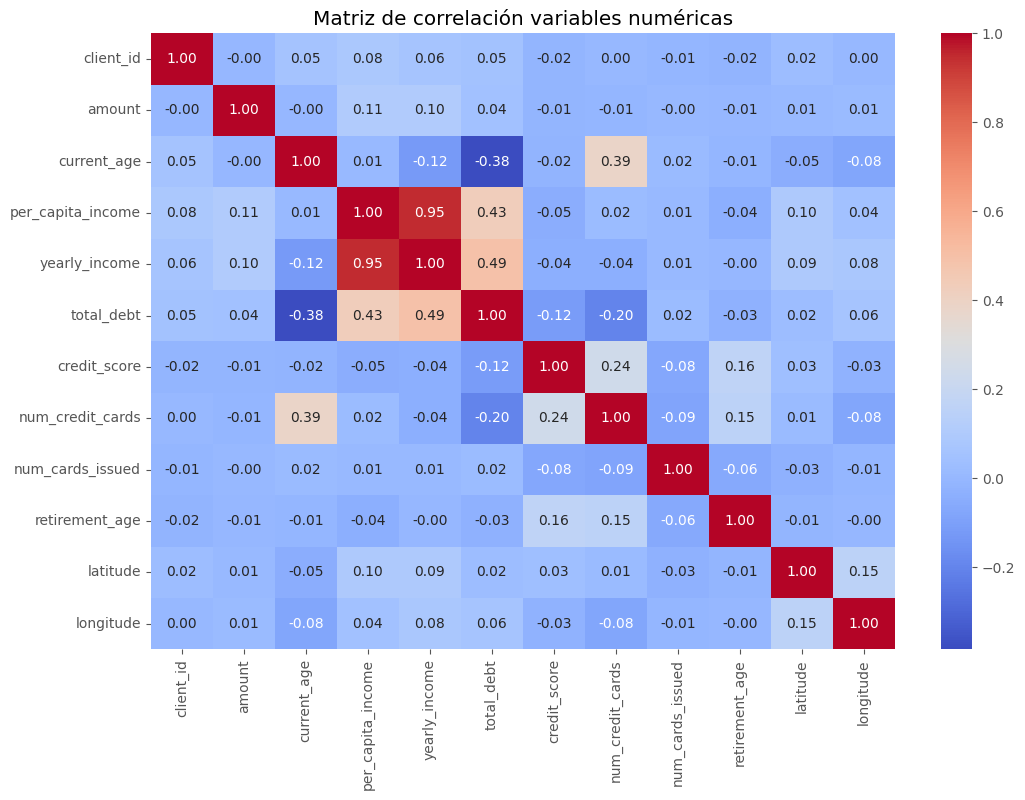

In [34]:
# 6. Correlaciones (solo variables numéricas)
plt.figure(figsize=(12,8))
sns.heatmap(df_model[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación variables numéricas")
plt.show()

# Modelo

In [35]:

# 2. LIMPIEZA Y FEATURE ENGINEERING
# Convertir fechas a antigüedad
df_model['acct_open_date'] = pd.to_datetime(df_model['acct_open_date'], errors='coerce')
df_model['account_age_days'] = (pd.Timestamp('today') - df_model['acct_open_date']).dt.days
df_model.drop(columns='acct_open_date', inplace=True)

# Agrupación: gasto total por cliente y categoría
gasto_agg = df_model.groupby(['client_id', 'name'])['amount'].sum().reset_index()

# Obtener características únicas por cliente
caracteristicas_cliente = df_model.drop(columns=['amount', 'name']).drop_duplicates(subset='client_id')

# Merge para tener una tabla final: cliente + mcc + gasto + características
df_final = gasto_agg.merge(caracteristicas_cliente, on='client_id', how='left')

In [36]:
# 3. PREPARACIÓN DE VARIABLES
# Variables categóricas a codificar
categoricas = ['gender', 'name', 'card_brand', 'card_type', 'merchant_state']
df_final[categoricas] = df_final[categoricas].astype(str)  # asegurar tipo string para one-hot

# One-hot encoding
df_encoded = pd.get_dummies(df_final, columns=categoricas, drop_first=True)


In [37]:
df_encoded

,client_id,amount,current_age,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,num_cards_issued,retirement_age,...,merchant_state_TN,merchant_state_TX,merchant_state_UT,merchant_state_VA,merchant_state_VT,merchant_state_Vatican City,merchant_state_WA,merchant_state_WI,merchant_state_WV,merchant_state_WY
0,0,2862.64,33,29237.0,59613.0,36199.0,763,4,1,69,...,False,False,False,False,False,False,False,False,False,False
1,0,2593.56,33,29237.0,59613.0,36199.0,763,4,1,69,...,False,False,False,False,False,False,False,False,False,False
2,0,5403.35,33,29237.0,59613.0,36199.0,763,4,1,69,...,False,False,False,False,False,False,False,False,False,False
3,0,87.08,33,29237.0,59613.0,36199.0,763,4,1,69,...,False,False,False,False,False,False,False,False,False,False
4,0,37048.23,33,29237.0,59613.0,36199.0,763,4,1,69,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93233,1998,79.83,65,0.0,645.0,790.0,688,3,1,67,...,False,False,False,False,False,False,False,False,False,False
93234,1998,80.77,65,0.0,645.0,790.0,688,3,1,67,...,False,False,False,False,False,False,False,False,False,False
93235,1998,250.02,65,0.0,645.0,790.0,688,3,1,67,...,False,False,False,False,False,False,False,False,False,False
93236,1998,22824.78,65,0.0,645.0,790.0,688,3,1,67,...,False,False,False,False,False,False,False,False,False,False


### RANDOM FOREST

In [38]:

# Separar variables
X = df_encoded.drop(columns=['amount', 'client_id'])
y = df_encoded['amount']

# 4. DIVISIÓN ENTRENAMIENTO/PRUEBA
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. ENTRENAMIENTO DEL MODELO
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [39]:
# 6. PREDICCIONES
y_pred = model.predict(X_test)

# 7. MÉTRICAS DE EVALUACIÓN
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔍 Evaluación del modelo:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

🔍 Evaluación del modelo:
RMSE: 21061.54
MAE: 5233.82
R²: 0.1775


### XBG

In [40]:

# 1. Crear el DMatrix de XGBoost (opcional pero más eficiente)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 2. Definir parámetros del modelo
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# 3. Entrenamiento
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# 4. Predicciones
y_pred_xgb = xgb_model.predict(dtest)

# 5. Evaluación
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("\n🔍 Evaluación del modelo XGBoost:")
print(f"RMSE: {rmse_xgb:.2f}")
print(f"MAE: {mae_xgb:.2f}")
print(f"R²: {r2_xgb:.4f}")



🔍 Evaluación del modelo XGBoost:
RMSE: 20881.43
MAE: 5143.65
R²: 0.1915
